#Project: Olympic Medal Count by Country

**Objective:**
To analyze the Olympic Games dataset

**Dataset:**

athlete_events.csv - contains athlete-level data for all Olympic Games from 1896 to 2016.

noc_regions.csv - maps the 3-letter NOC codes (like USA, IND, CHN) to country/region names.

(Source: Kaggle – 120 years of Olympic history: athletes and results)


**Uses:**

Sports Analytics: Helps countries and sports bodies measure long-term performance and identify strengths and weaknesses.

Policy & Investment: Governments can analyze which sports need more funding or infrastructure.

#Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading the csv files
athletes = pd.read_csv('/content/athlete_events.csv')
regions = pd.read_csv('/content/noc_regions.csv')

Small Checks

In [4]:
#check the no. of rows and columns
print(athletes.shape)
print(regions.shape)

(271116, 15)
(230, 3)


In [5]:
#check column names
print('names of the columns of atheletes: ', athletes.columns.tolist())
print('names of the columns of regions: ', regions.columns.tolist())

names of the columns of atheletes:  ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']
names of the columns of regions:  ['NOC', 'region', 'notes']


In [6]:
# check data ranges
print('start year', athletes['Year'].min())
print('end year', athletes['Year'].max())

start year 1896
end year 2016


In [7]:
athletes['Season'].dropna().unique()

array(['Summer', 'Winter'], dtype=object)

In [9]:
athletes['Medal'].dropna().unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

In [20]:
athletes['Sport'].nunique() #no. of unique sports

66

In [12]:
athletes.head() #for visualing inspecting the structure

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#**Analyzing Summer Olympics**



In [15]:
summer = athletes[athletes["Season"] == "Summer"]
summer["Season"].unique()

array(['Summer'], dtype=object)

Olympics dataset has both Summer & Winter Games.
Summer Games are larger and more commonly analyzed.
Hence to keep things consistent for comparisons, have first taken summer

In [22]:
# removing "Art Competitions" as some old Olympics had art competitions (not relevant here)
summer = summer[summer["Sport"] != "Art Competitions"]

#multiple medal count per team
before = summer["Medal"].count()

# droping duplicate medals (Year, Team, NOC, Event, Medal) combo
summer = summer.drop_duplicates(subset=["Year", "Team", "NOC", "Event", "Medal"])

after = summer["Medal"].count()

print("Medals before removing duplicates:", before)
print("Medals after removing duplicates:", after)

Medals before removing duplicates: 33932
Medals after removing duplicates: 15927


We want only real sports performance. Hence removed 'Art Competitions' which were part of early Olympics

Team sports inflate medal counts.
Example: if a football team wins Gold, 22 players = 22 golds in raw data.
But, the country only earned 1 Gold.

In [27]:
# merging summer data with noc_regions
summer = summer.merge(regions, on="NOC", how="left")

# quick check
summer.head()

summer[["NOC", "region"]].head(10)

,NOC,region
0,CHN,China
1,CHN,China
2,DEN,Denmark
3,DEN,Denmark
4,NED,Netherlands
5,NED,Netherlands
6,FIN,Finland
7,FIN,Finland
8,FIN,Finland
9,FIN,Finland


In [28]:
# count total medals by country
medals_by_country = (
    summer.dropna(subset=["Medal"])   # keep only rows with medals
          .groupby("region")["Medal"]
          .count()
          .sort_values(ascending=False)
)

# top 10 countries
medals_by_country.head(10)

,Medal
region,
USA,2536
Russia,1577
Germany,1368
UK,886
France,764
Italy,594
China,545
Australia,518
Sweden,509


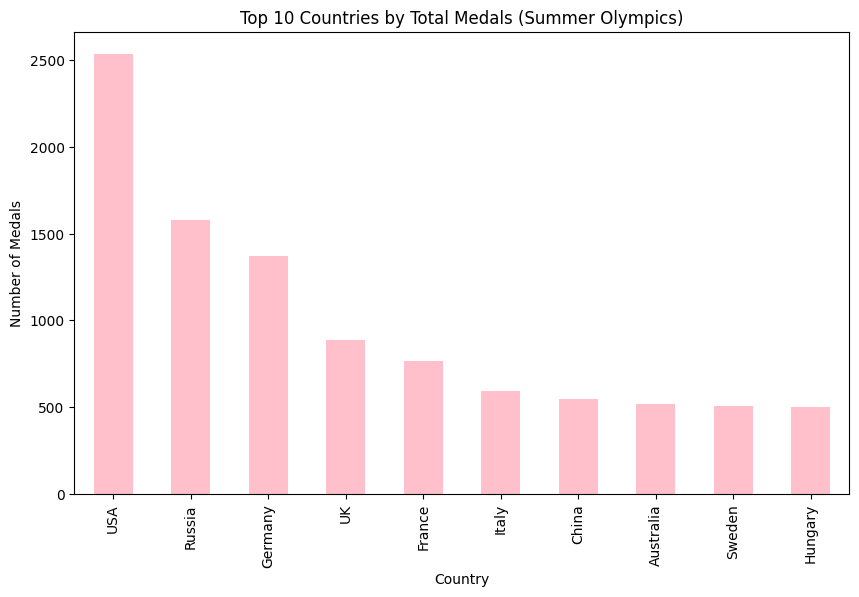

In [39]:
#Bargraph for Top 10 countries
top10 = medals_by_country.head(10)

plt.figure(figsize=(10,6))
top10.plot(kind="bar", color="pink")
plt.title("Top 10 Countries by Total Medals (Summer Olympics)")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.show()


this bargraph shows the USA, Russia and Germany are in top 3 positions

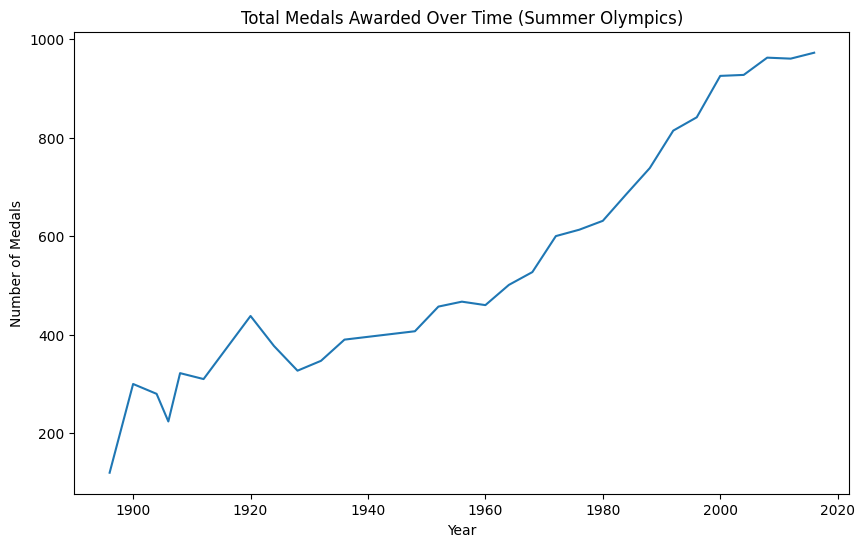

In [41]:
# medals per year
medals_by_year = (
    summer.dropna(subset=["Medal"])
          .groupby("Year")["Medal"]
          .count()
)

plt.figure(figsize=(10,6))
medals_by_year.plot()
plt.title("Total Medals Awarded Over Time (Summer Olympics)")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.show()


here we can see how Olympics have grown (more sports/events implies more medals).

In [44]:
#Medal count by sports
sport_country_medals = (
    summer.dropna(subset = ['Medal'])
    .groupby(['region', 'Sport'])['Medal']
    .count()
    .reset_index()
)

top_sports = (
    sport_country_medals.groupby('Sport')['Medal']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_sports

,Medal
Sport,
Athletics,3003
Swimming,1684
Wrestling,1296
Gymnastics,974
Boxing,944
Shooting,853
Rowing,784
Cycling,740
Canoeing,679


In [53]:
# medals per country per year
medals_country_year = (
    summer.dropna(subset=["Medal"])
          .drop_duplicates(subset=["Games", "NOC", "Sport", "Event", "Medal"])
          .groupby(["Year", "region"], as_index=False)["Medal"]
          .count()
          .rename(columns={"Medal": "Medals"})
)

medals_country_year.head()


,Year,region,Medals
0,1896,Australia,3
1,1896,Austria,5
2,1896,Denmark,6
3,1896,France,11
4,1896,Germany,14


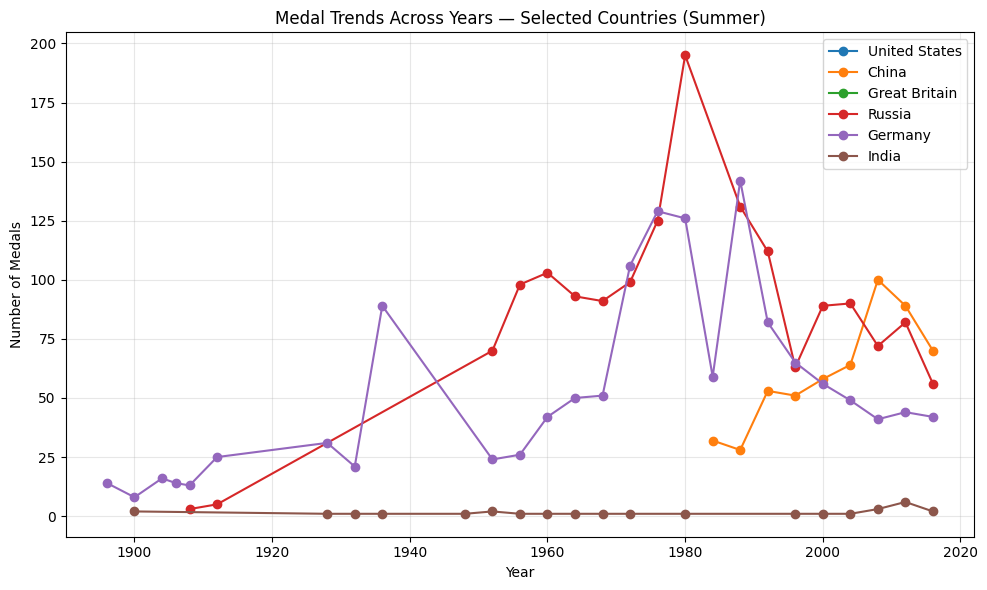

In [56]:
selected = ["United States", "China", "Great Britain", "Russia", "Germany", "India"]

subset = medals_country_year[medals_country_year["region"].isin(selected)]

plt.figure(figsize=(10,6))
for country in selected:
    s = subset[subset["region"] == country]
    plt.plot(s["Year"], s["Medals"], marker="o", label=country)

plt.title("Medal Trends Across Years — Selected Countries (Summer)")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


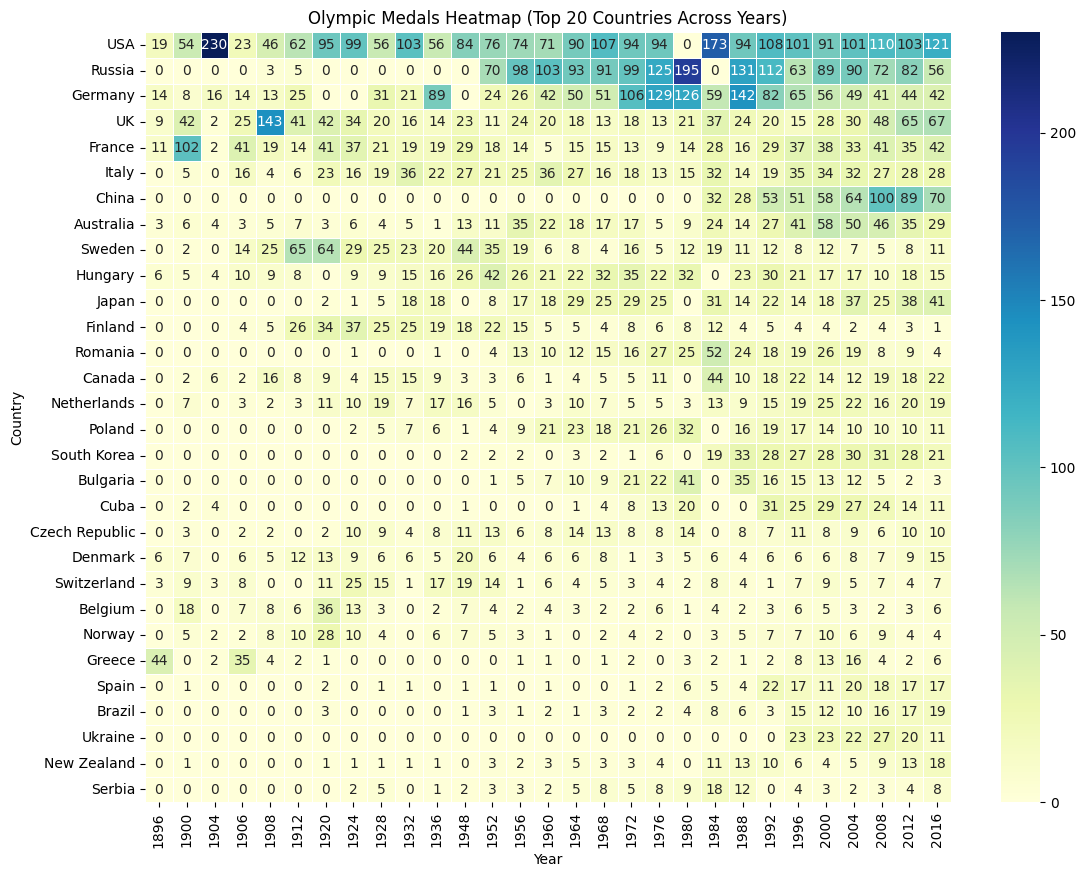

In [64]:
import seaborn as sns

# pivot table: rows = countries, columns = years, values = medal counts
pivot = medals_country_year.pivot(index="region", columns="Year", values="Medals").fillna(0)

# check the shape
pivot.shape
pivot.head()
# select top 20 countries overall
top20 = medals_by_country.head(20).index
pivot_top20 = pivot.loc[top20]

plt.figure(figsize=(13,10))
sns.heatmap(pivot_top30, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="g")
plt.title("Olympic Medals Heatmap (Top 20 Countries Across Years)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


from this we can infer that


*   Russia has won the highest in all the years, in the year 1980, with medal count 195
*   next comes USA in 1984 with medal count 173

*  but we go with total no. of medals all over the years, we get USA at 1st place and Russia at 2nd
*   India is neither in top 10 nor in top 20



In [85]:
medals_country_year_type = (
    summer.dropna(subset=["Medal"])
          .groupby(["Year", "region", "Medal"])
          .size()   # counts medals
          .unstack(fill_value=0)
          .reset_index()   # <- makes "Year" and "region" proper columns again
)

medals_country_year_type.head(10)

Medal,Year,region,Bronze,Gold,Silver
0,1896,Australia,1,2,0
1,1896,Austria,2,2,1
2,1896,Denmark,3,1,2
3,1896,France,2,5,4
4,1896,Germany,2,7,5
5,1896,Greece,17,10,17
6,1896,Hungary,3,2,1
7,1896,Switzerland,0,1,2
8,1896,UK,3,3,3
9,1896,USA,2,11,6


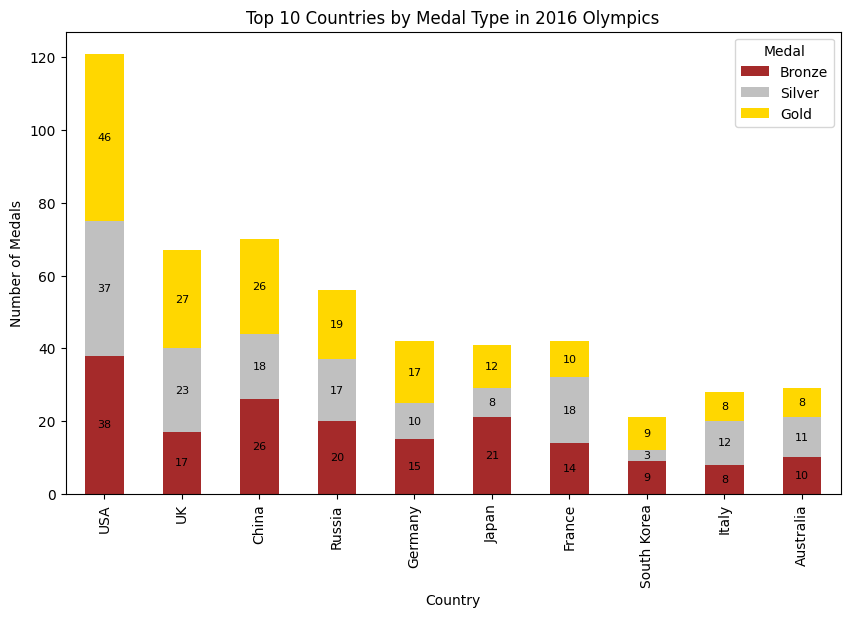

In [98]:
year = 2016
subset = medals_country_year_type[medals_country_year_type["Year"] == year]
subset = subset.sort_values(by=["Gold", "Silver", "Bronze"], ascending=False).head(10)

# reorder medal columns to Gold -> Silver -> Bronze
subset = subset[["region","Bronze" , "Silver", "Gold"]]

# stacked bar plot
ax=subset.plot(
    x="region",
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color={"Gold": "gold", "Silver": "silver", "Bronze": "brown"}
)

plt.title(f"Top 10 Countries by Medal Type in {year} Olympics")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
# add numbers on top of each section
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=8)
plt.show()


Have separated total medals into medal types :Gold, Silver, Bronze
(only for summer games)

Instead of “USA won 121 medals in 2016,”
from graph we can infer: USA has Gold (46), Silver (37), and Bronze (38).

This is more meaningful because Olympic rankings are based on Gold medals first (not total).
Hence we can compare Medal quality not quantity

Example:
China may win fewer medals overall than the USA, but often has more Golds.
That changes the perception of performance.
The stacked bar chart helps visualize balance.
Countries like the USA often have tall bars (lots of total medals) with strong Gold share.
Countries like India may have smaller bars with more Bronze than Gold, showing where they stand.


#**Analyzing Winter Olympics**

In [101]:
winter = athletes[athletes['Season']=='Winter']
winter['Season'].unique()

array(['Winter'], dtype=object)

In [104]:
winter = winter.drop_duplicates(subset=['Year','Team','NOC','Event','Medal'])
winter = winter.merge(regions, on='NOC', how='left')
winter.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region_x,notes_x,region_y,notes_y
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,Netherlands,NaN
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,Netherlands,NaN
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,Netherlands,NaN
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,Netherlands,NaN


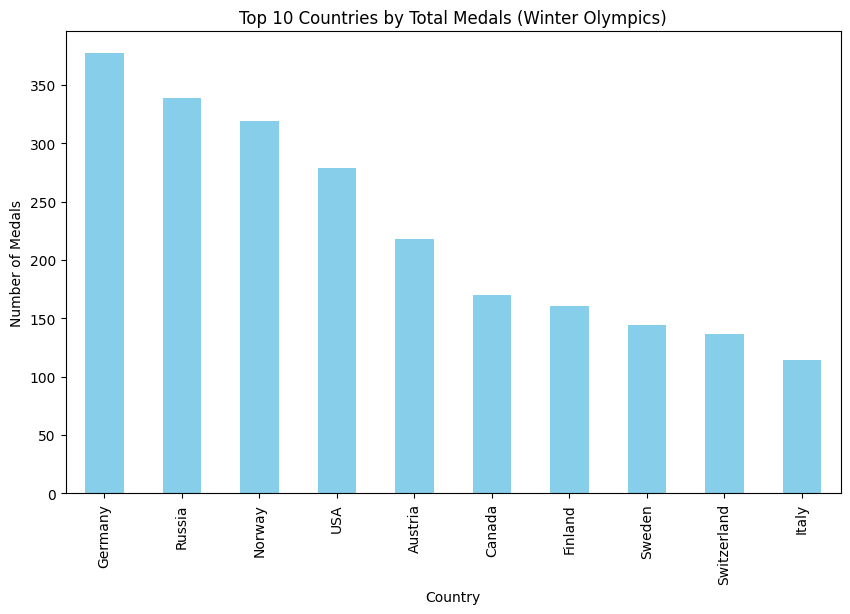

In [109]:
winter_medals_by_country= (
    winter.dropna(subset=['Medal'])
    .groupby("region_y")['Medal']
    .count()
    .sort_values(ascending=False)
)
winter_top10 = winter_medals_by_country.head(10)

plt.figure(figsize=(10,6))
winter_top10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Medals (Winter Olympics)')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

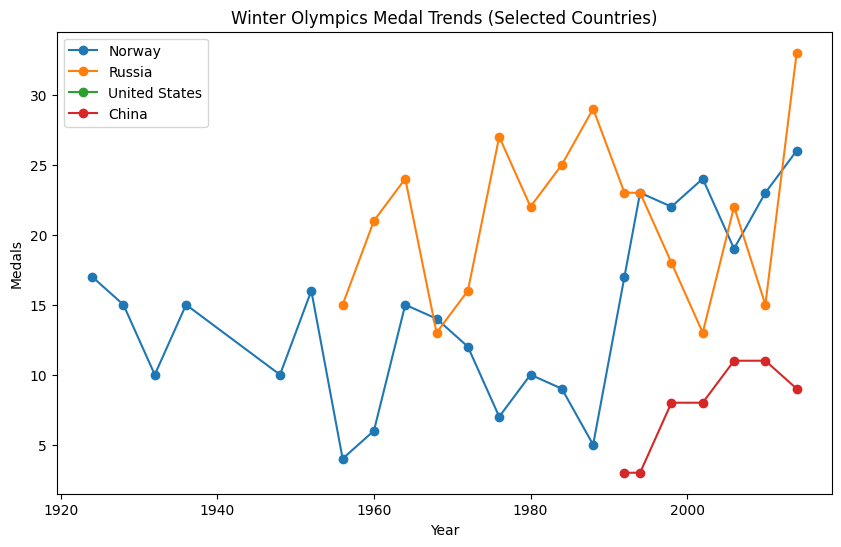

In [118]:
winter_country_year = (
    winter.dropna(subset=["Medal"])
          .groupby(["Year", "region_y"])["Medal"]
          .count()
          .reset_index()
)

selected_winter = ["Norway", "Russia", "United States", "China"]
subset_winter = winter_country_year[winter_country_year["region_y"].isin(selected_winter)]

plt.figure(figsize=(10,6))
for country in selected_winter:
    s = subset_winter[subset_winter["region_y"] == country]
    plt.plot(s["Year"], s["Medal"], marker="o", label=country)

plt.title("Winter Olympics Medal Trends (Selected Countries)")
plt.xlabel("Year")
plt.ylabel("Medals")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


#Conclusion so far
we can see that
It data shows seasonal differences:
Summer = more sports/events
Winter = smaller but intense competition.

Highlights different countries:

Summer: USA, China, Russia dominate.
Winter: Norway, Canada, Germany dominate.